# Visualization - Sephora Website

#### Introduction

Saya adalah seorang data scientist di sebuah e-comerce yang fokus dalam penjualan alat kosmetik, yaitu sephora.
pada suatu hari CEO datang untuk menenyakan beberapa hal dibawah, kita dapat menjawabnya menggunakan visualisasi data sehingga mudah dipahami oleh seorang CEO.

#### Task

- [x] Untuk kategori "Perfume", "Moisturizers" bagaimana distribusi untuk harganya ? apakah mahal atau murah ?
- [x] Untuk brand "SEPHORA COLLECTION" apakah banyak yang suka dengan produknya ? (jangan gunakan review 0)
- [x] Bandingkan harga antara brand "Dior" dengan "SEPHORA COLLECTION" ?
- [x] Siapa brand yang paling banyak memiliki jumlah barang ? urutkan top 5 ?
- [x] Siapa brand yang paling banyak disukai ? urutkan top 5 ?
- [x] Kategori apa yang paling banyak menyumbang penjualan dari brand "tarte" ?
- [x] Apakah ada hubungan antara harga dengan banyaknya produk yang terjual, dan banyaknya produk yang disukai ?

Untuk pengerjaan bisa melakukan modifikasi terhadap dataset terlebih dahulu, kemudian dilakukan visualisasi

#### Data Source

Dataset can be downloaded here:
https://www.kaggle.com/raghadalharbi/all-products-available-on-sephora-website/version/1

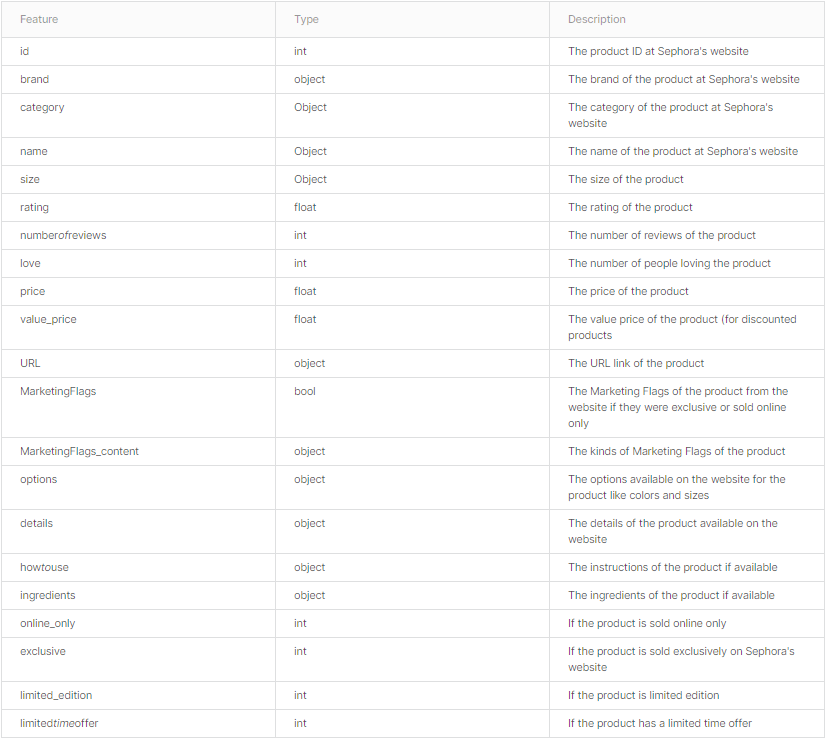

## Import Libraries

In [14]:
# Import default libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data Description Function
def data_desc(df):
    dataDesc = []

    for i in df.columns:
        dataDesc.append([
            i,
            df[i].dtypes,
            df[i].isna().sum(),
            round((((df[i].isna().sum()) / len(df)) * 100), 2),
            df[i].nunique(),
            df[i].drop_duplicates().sample(2).values
        ])

    description = pd.DataFrame(dataDesc, columns=[
        'Data Feature',
        'Data Types',
        'Null',
        'Null Percentage',
        'Unique',
        'Unique Sample'
    ])

    return description

## Import Data

In [18]:
df = pd.read_csv('data/sephora_website_dataset.csv', index_col=0)
df.head(2)

brand   category                            name  \
id                                                                   
2218774  Acqua Di Parma  Fragrance  Blu Mediterraneo MINIATURE Set   
2044816  Acqua Di Parma    Cologne                         Colonia   

                   size  rating  number_of_reviews  love  price  value_price  \
id                                                                             
2218774  5 x 0.16oz/5mL     4.0                  4  3002   66.0         75.0   
2044816   0.7 oz/ 20 mL     4.5                 76  2700   66.0         66.0   

                                                       URL  MarketingFlags  \
id                                                                           
2218774  https://www.sephora.com/product/blu-mediterran...            True   
2044816  https://www.sephora.com/product/colonia-P16360...            True   

        MarketingFlags_content  \
id                               
2218774            online only   
2044816            online only   

                                                   options  \
id                                                           
2218774                                         no options   
2044816   - 0.7 oz/ 20 mL  Spray  - 1.7 oz/ 50 mL Eau d...   

                                                   details  \
id                                                           
2218774  This enchanting set comes in a specially handc...   
2044816  An elegant timeless scent filled with a fresh-...   

                                                how_to_use  \
id                                                           
2218774  Suggested Usage:-Fragrance is intensified by t...   
2044816                                    no instructions   

                                               ingredients  online_only  \
id                                                                        
2218774  Arancia di Capri Eau de Toilette: Alcohol Dena...            1   
2044816                                            unknown            1   

         exclusive  limited_edition  limited_time_offer  
id                                                       
2218774          0                0                   0  
2044816          0                0                   0

In [41]:
# Numeric Data Stats
df.describe()

rating  number_of_reviews          love        price  value_price  \
count  9168.000000        9168.000000  9.168000e+03  9168.000000   9168.00000   
mean      3.990020         282.139180  1.627859e+04    50.063237     51.82359   
std       1.007707         890.642028  4.260651e+04    47.164989     49.45902   
min       0.000000           0.000000  0.000000e+00     2.000000      2.00000   
25%       4.000000          10.000000  1.600000e+03    24.000000     25.00000   
50%       4.000000          46.000000  4.800000e+03    35.000000     35.00000   
75%       4.500000         210.000000  1.380000e+04    59.000000     60.00000   
max       5.000000       19000.000000  1.300000e+06   549.000000    549.00000   

       online_only    exclusive  limited_edition  limited_time_offer  
count  9168.000000  9168.000000      9168.000000         9168.000000  
mean      0.234839     0.264725         0.091841            0.000327  
std       0.423921     0.441211         0.288817            0.018087  
min       0.000000     0.000000         0.000000            0.000000  
25%       0.000000     0.000000         0.000000            0.000000  
50%       0.000000     0.000000         0.000000            0.000000  
75%       0.000000     1.000000         0.000000            0.000000  
max       1.000000     1.000000         1.000000            1.000000

In [23]:
# Data Description
data_description = data_desc(df)
print(len(df))
data_description

9168


Data Feature Data Types  Null  Null Percentage  Unique  \
0                    brand     object     0              0.0     324   
1                 category     object     0              0.0     143   
2                     name     object     0              0.0    9106   
3                     size     object     0              0.0    1623   
4                   rating    float64     0              0.0      10   
5        number_of_reviews      int64     0              0.0     833   
6                     love      int64     0              0.0    1683   
7                    price    float64     0              0.0     286   
8              value_price    float64     0              0.0     322   
9                      URL     object     0              0.0    9168   
10          MarketingFlags       bool     0              0.0       2   
11  MarketingFlags_content     object     0              0.0      10   
12                 options     object     0              0.0     564   
13                 details     object     0              0.0    8839   
14              how_to_use     object     0              0.0    6497   
15             ingredients     object     0              0.0    6962   
16             online_only      int64     0              0.0       2   
17               exclusive      int64     0              0.0       2   
18         limited_edition      int64     0              0.0       2   
19      limited_time_offer      int64     0              0.0       2   

                                        Unique Sample  
0                              [Supergoop!, TAN-LUXE]  
1                                [Perfume, Lip Gloss]  
2   [Intense Hydrating Mask Packette, Chill & Glow...  
3                  [9 x 0.05 oz /1.3g, 0.71 oz/ 20 g]  
4                                          [4.0, 3.5]  
5                                          [961, 139]  
6                                        [940, 52100]  
7                                      [125.0, 198.0]  
8                                      [129.0, 214.0]  
9   [https://www.sephora.com/product/le-marc-lip-f...  
10                                      [False, True]  
11  [limited time offer · limited edition · exclus...  
12  [ - 3.4 oz/ 101 mL  Oil - 3.4 oz/ 101 mL Rose ...  
13  [What it is:\nA creamy- highlighting and strob...  
14  [Suggested Usage:-Use each shade as both a div...  
15  [Sucrose- Sodium Cocoyl Glycinate- Sodium Laur...  
16                                             [1, 0]  
17                                             [0, 1]  
18                                             [0, 1]  
19                                             [0, 1]

## Data Visualization
1) Untuk kategori "Perfume", "Moisturizers" bagaimana distribusi untuk harganya ? apakah mahal atau murah ?


In [16]:
df.category.value_counts()

Perfume                      665
Moisturizers                 451
Face Serums                  384
Value & Gift Sets            378
Face Wash & Cleansers        247
                            ... 
Lid Shadow Brush               1
Curls & Coils                  1
Body Moisturizers              1
Powder Brush                   1
Hair Styling & Treatments      1
Name: category, Length: 143, dtype: int64

Text(0, 0.5, 'frequency')

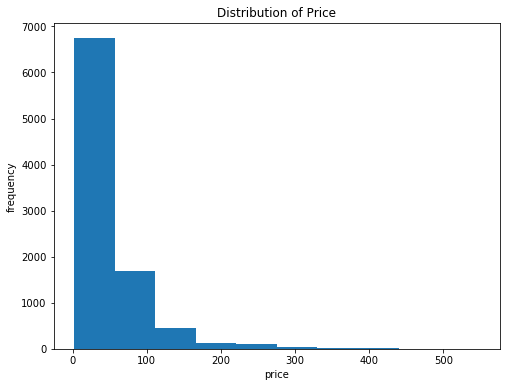

In [39]:
# Check distribution of price

fig = plt.figure(figsize=(8,6))
ax = plt.axes()

ax.hist(df.price)
ax.set_title('Distribution of Price')
ax.set_xlabel('price')
ax.set_ylabel('frequency')

# price range from 2 - 549
# most price is between 2 - 100
# price will be put into binning -> very cheap, cheap, medium, expensive, very expensive, premium

In [121]:
# create dataframe category vs price
df_category_price = df[['category', 'price']]

# binning the price into category (very cheap, cheap, medium, expensive, very expensive, premium)

# df_category_price['price_category'] = df_category_price['price'] # Alt 1 for copying column and rows
df_category_price['price_category'] = df_category_price.loc[:,'price'] # Alt 2 for copying column and rows
df_category_price['price_category'] = pd.cut(df_category_price['price_category'], [0, 100, 200, 300, 400, 500, 600], labels=['very cheap', 'cheap', 'medium', 'expensive', 'very expensive', 'premium'])

data_perfume_moist = df_category_price[(df.category=='Perfume') | (df.category=='Moisturizers')]
data_perfume_moist

C:\Users\Damianus Deni\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C:\Users\Damianus Deni\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


category  price price_category
id                                         
1417567       Perfume  180.0          cheap
1417617       Perfume  120.0          cheap
1417609       Perfume  180.0          cheap
1638832       Perfume  210.0         medium
2221596       Perfume   58.0     very cheap
...               ...    ...            ...
2047744       Perfume   79.0     very cheap
2047777       Perfume   79.0     very cheap
2047769       Perfume   79.0     very cheap
2235133  Moisturizers   17.0     very cheap
1788991       Perfume   17.0     very cheap

[1116 rows x 3 columns]

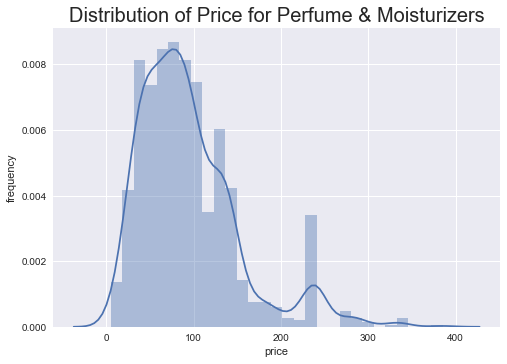

In [122]:
# Check distribution of price for Perfume & Moisturizers
# fig = plt.figure(figsize=(8,6))
# ax = plt.axes()

# ax.hist(data_perfume_moist.price)
# ax.set_title('Distribution of Price')
# ax.set_xlabel('price')
# ax.set_ylabel('frequency')

sns.distplot(data_perfume_moist.price)
plt.title('Distribution of Price for Perfume & Moisturizers', size=20)

plt.xlabel('price')
plt.ylabel('frequency')

plt.show()

Text(0, 0.5, 'frequency')

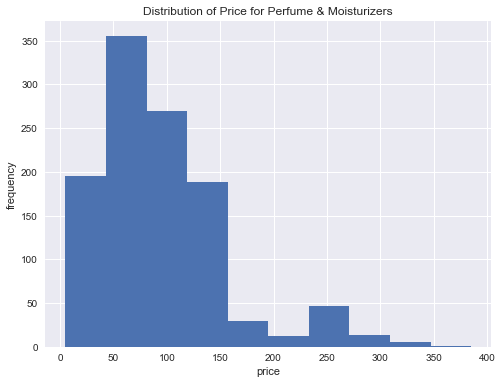

In [123]:
# Check distribution of price for Perfume & Moisturizers
plt.style.use('seaborn')

fig = plt.figure(figsize=(8,6))
ax = plt.axes()

ax.hist(data_perfume_moist.price)
ax.set_title('Distribution of Price for Perfume & Moisturizers')
ax.set_xlabel('price')
ax.set_ylabel('frequency')

In [124]:
price_by_price_category = data_perfume_moist[['price', 'price_category']].groupby(['price_category'], as_index=False).count()
price_by_price_category

price_category  price
0      very cheap    745
1           cheap    295
2          medium     70
3       expensive      6
4  very expensive      0
5         premium      0

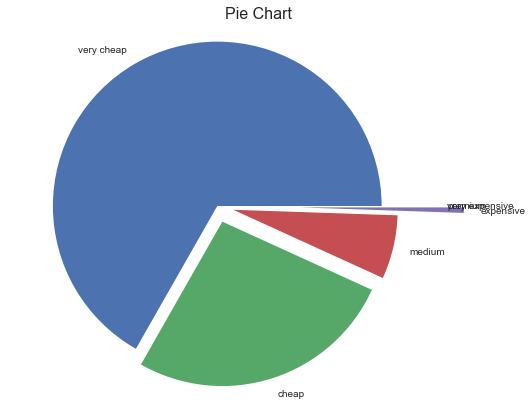

In [125]:
# Check distribution of price for Perfume & Moisturizers

# Histogram
# plt.style.use('seaborn')

# fig = plt.figure(figsize=(8,6))
# ax = plt.axes()

# ax.hist(data_perfume_moist.price_category)
# ax.set_title('Distribution of Price for Perfume & Moisturizers')
# ax.set_xlabel('price')
# ax.set_ylabel('frequency')

# Pie Chart
fig = plt.figure(figsize=(9,7))
ax = plt.axes()

# data
ax.pie(price_by_price_category['price'], labels = price_by_price_category['price_category'], explode = (0, 0.1, 0.1, 0.5, 0.3, 0.3))

# data label
ax.set_title('Pie Chart', size=16)
ax.axis('equal')

# show
plt.show()

2) Untuk brand "SEPHORA COLLECTION" apakah banyak yang suka dengan produknya ? (jangan gunakan review 0)